## Sample PDF collecter and converter

Here is the website we are using as the sample for scraping and converting, we are only targeting the sometimes nested pdf links

![Sample site](Sample_site.png)

In [18]:
#script created to extract links and save pdfs using requests
from crawler import extract_links, save_pdfs
#script created to iterate through pdfs and convert them to a json object
from pdf2json import walk_pdfs_and_convert
#A little bit of ml used to determine pdf schema
from clustering import cluster
#PYPI package used to create a list of files from a directory
import glob
import json

In [19]:
#This script will extract all PDF links from the given url
url = "https://irp.fas.org/doddir/army/"
links_dict = extract_links(url)
#print first 5 keys and values of links_dict
for i in range(5):
    print(f"{list(links_dict)[i]}: {links_dict[list(links_dict)[i]]}")

ADP 1. The Army: adp1.pdf
ADP 1-01. Doctrine Primer: adp1_01.pdf
ADP 1-02. Terms and Military Symbols: adp1_02.pdf
FM 1-02.2: fm1-02-2.pdf
ADRP 1. The Army Profession: adrp1.pdf


In [20]:
#save the pdfs to pdfs folder
save_pdfs(url, links_dict, max_pdfs=10)

### Sample saved PDF
![Sample PDF](Sample_PDF.png)

In [21]:
#glob pdfs and convert to json outputting to output.json
pdf_list = glob.glob("pdfs/*")
walk_pdfs_and_convert(pdf_list)

## Sample output.json
![Sample Output](output_sample.png)

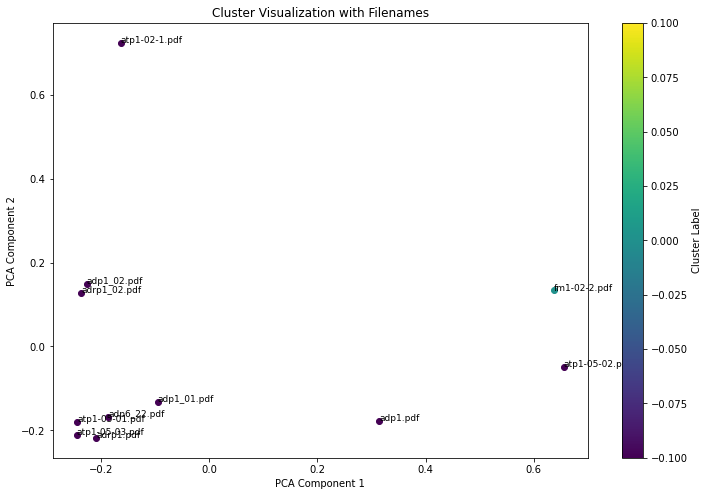

In [22]:
#Perform clustering on output.json
#The visualization shows the closeness in formatting of the documents not closeness of content 
#PCA (principal component analysis) scores based on formatting patterns
#Cluster label - KMeans clustering based on similarity of data
with open("output.json") as f:
    json_objects = json.load(f)

cluster(json_objects)